# PoDS Assignment 2022-23

## Name: Sachin Patil (22530172)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Section-1:-Data-Loading-and-Exploration" data-toc-modified-id="Section-1:-Data-Loading-and-Exploration">Section 1: Data Loading and Exploration</a></span></li>
    <ul><li><span><a href="#Data-Loading" ata-toc-modified-id="Data-Loading">Data Loading</a></span></li></ul>
    <ul><li><span><a href="#Check-the-shape-of-the-data" ata-toc-modified-id="Check-the-shape-of-the-data">Check the shape of the data</a></span></li></ul>
    </ul>
<ul class="toc-item"><li><span><a href="#Section-2:-Data-Processing" data-toc-modified-id="Section-2:-Data-Processing">Section 2: Data Processing</a></span></li></ul>
<ul class="toc-item"><li><span><a href="#Section-3:-Analysis" data-toc-modified-id="Section-3:-Analysis">Section 3: Analysis</a></span></li></ul></div>

In [2]:
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', context='talk', rc={'figure.figsize': (8,4)}, font_scale=0.8)

## Section 1: Data Loading and Exploration

### Data Loading

In [3]:
dataset_location = 'adverts.csv'
adverts = pd.read_csv(
    dataset_location
)

In [58]:
adverts.head(2)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,car_types
1970-01-01,202006039777689,0.0,NA,Grey,Volvo,XC90,NEW,0,73970,SUV,False,Petrol Plug-in Hybrid,1
1970-01-02,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011,7000,Saloon,False,Diesel,2


## Types of Features:
* Categorical
* Binomial


### 1. Categorical Feature - It describes the grouping on the given dataset based on the different categories

#### Here we are using <b>get_dummies()</b> method for hot encoding, and prefix parameter is used to improve the readibality of the column name


In [5]:
adverts_cat = pd.get_dummies(adverts,columns=['body_type'], prefix='CT')


In [ ]:
adverts1[['standard_make','CT_Estate','CT_Hatchback','CT_Limousine','CT_SUV','CT_Estate','CT_Saloon','CT_Coupe','CT_MPV','CT_Convertible',
          'CT_Pickup','CT_Combi Van','CT_Minibus','CT_Panel Van']]

In [7]:
from pathlib import Path  

In [ ]:
adverts1.to_csv(Path('out.csv'),index=False)

### Split Dataframe (take 10000 records as a sample)

In [9]:
adverts = adverts.iloc[:60000,:]

In [10]:
adverts.count()

public_reference         60000
mileage                  59984
reg_code                 55309
standard_colour          59229
standard_make            60000
standard_model           60000
vehicle_condition        60000
year_of_registration     55094
price                    60000
body_type                59880
crossover_car_and_van    60000
fuel_type                59910
dtype: int64

In [11]:
adverts['body_type'][:5]

0          SUV
1       Saloon
2          SUV
3    Hatchback
4          SUV
Name: body_type, dtype: object

In [12]:
## Most Common Car type
body_types = adverts['body_type'].value_counts()
body_types

Hatchback          24820
SUV                17340
Saloon              5552
Estate              3714
Coupe               3485
MPV                 2415
Convertible         2373
Pickup                78
Combi Van             33
Minibus               23
Limousine             20
Panel Van             11
Window Van             8
Camper                 7
Car Derived Van        1
Name: body_type, dtype: int64

* Based on above result, we can say that the most common car type is <b>Hatchback</b>, and least common car type is <b>Panel Van</b>

<AxesSubplot: >

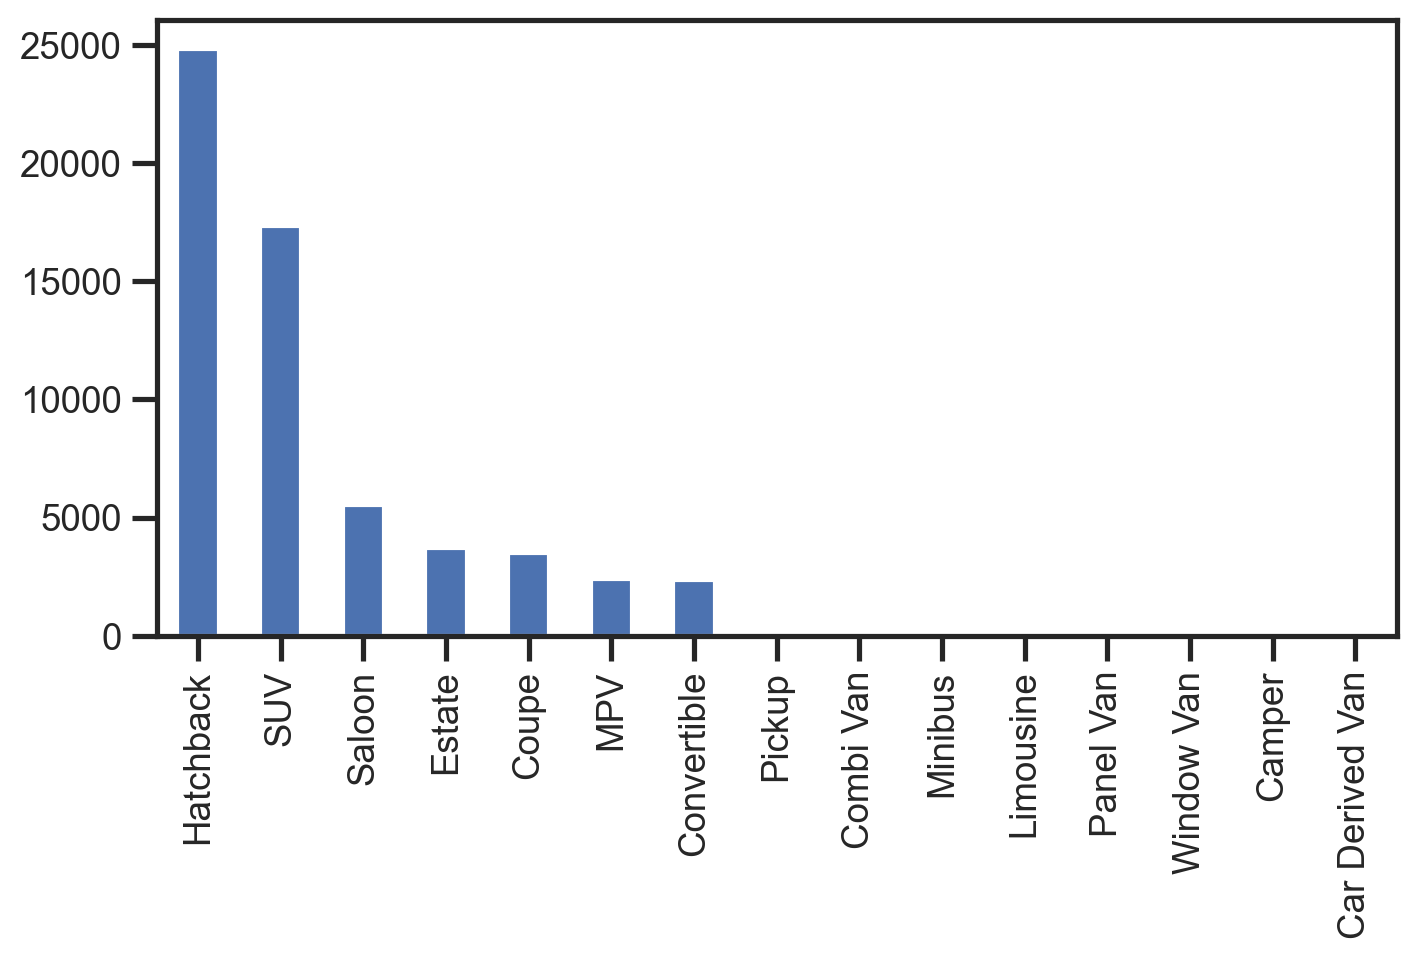

In [13]:
body_types.plot(kind='bar')

### Check the shape of the data

In [14]:
adverts.info()  # gives the information about the datatypes 
adverts.describe() # gives the airthmatic mean ,median, std etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   public_reference       60000 non-null  int64  
 1   mileage                59984 non-null  float64
 2   reg_code               55309 non-null  object 
 3   standard_colour        59229 non-null  object 
 4   standard_make          60000 non-null  object 
 5   standard_model         60000 non-null  object 
 6   vehicle_condition      60000 non-null  object 
 7   year_of_registration   55094 non-null  float64
 8   price                  60000 non-null  int64  
 9   body_type              59880 non-null  object 
 10  crossover_car_and_van  60000 non-null  bool   
 11  fuel_type              59910 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 5.1+ MB


,public_reference,mileage,year_of_registration,price
count,6.000000e+04,59984.000000,55094.000000,6.000000e+04
mean,2.020071e+14,37776.974410,2015.040222,1.718200e+04
std,1.593896e+10,34807.250291,6.108276,2.504508e+04
min,2.015062e+14,0.000000,1007.000000,2.500000e+02
25%,2.020090e+14,10416.500000,2013.000000,7.495000e+03
50%,2.020093e+14,28785.500000,2016.000000,1.269100e+04
75%,2.020102e+14,56915.000000,2018.000000,2.005200e+04
max,2.020110e+14,999999.000000,2020.000000,2.850000e+06


In [15]:
adverts_petrol = adverts[adverts['fuel_type']=='Petrol'] ##All vehicles with fuel type as Petrol
adverts_petrol.describe()

,public_reference,mileage,year_of_registration,price
count,3.229900e+04,32288.000000,29342.000000,3.229900e+04
mean,2.020071e+14,31687.905259,2014.841251,1.650861e+04
std,1.645818e+10,30879.253820,4.993874,3.158698e+04
min,2.015062e+14,0.000000,1933.000000,2.500000e+02
25%,2.020083e+14,8193.750000,2013.000000,6.495000e+03
50%,2.020093e+14,22333.500000,2017.000000,1.120000e+04
75%,2.020102e+14,46888.750000,2018.000000,1.838850e+04
max,2.020110e+14,233500.000000,2020.000000,2.850000e+06


In [16]:
adverts_diesel = adverts[adverts['fuel_type']=='Diesel'] ##All vehicles with fuel type as Diesel
adverts_diesel.describe()

,public_reference,mileage,year_of_registration,price
count,2.355800e+04,23555.000000,22540.000000,23558.000000
mean,2.020074e+14,49062.235704,2015.021118,16486.966720
std,1.514126e+10,37534.373992,3.404298,12679.365936
min,2.016011e+14,0.000000,1973.000000,299.000000
25%,2.020091e+14,20959.500000,2013.000000,8249.250000
50%,2.020100e+14,42000.000000,2016.000000,13490.000000
75%,2.020102e+14,71478.500000,2017.000000,20500.000000
max,2.020110e+14,999999.000000,2020.000000,192000.000000


In [17]:
adverts_petrol_hybrid = adverts[adverts['fuel_type']=='Petrol Hybrid'] ##All petrol hybrid vehicles
adverts_petrol_hybrid.describe()

,public_reference,mileage,year_of_registration,price
count,2.128000e+03,2127.000000,1787.000000,2128.000000
mean,2.020061e+14,25104.951575,2016.397314,20104.649906
std,1.662429e+10,30387.183371,24.057484,11521.755230
min,2.018041e+14,0.000000,1007.000000,1700.000000
25%,2.020082e+14,3000.000000,2016.000000,12499.000000
50%,2.020092e+14,15161.000000,2017.000000,17594.500000
75%,2.020101e+14,35791.000000,2019.000000,24278.250000
max,2.020110e+14,275000.000000,2020.000000,129990.000000


In [18]:
adverts_diesel_hybrid = adverts[adverts['fuel_type']=='Diesel Hybrid'] ##All diesel hybrid vehicles
adverts_diesel_hybrid.describe()

,public_reference,mileage,year_of_registration,price
count,2.190000e+02,218.000000,157.000000,219.000000
mean,2.020074e+14,18245.711009,2018.165605,37864.566210
std,1.211555e+10,34058.053093,2.209673,14863.605242
min,2.019020e+14,0.000000,2013.000000,6000.000000
25%,2.020082e+14,10.000000,2016.000000,29992.500000
50%,2.020100e+14,4602.500000,2019.000000,38900.000000
75%,2.020102e+14,10767.000000,2020.000000,45994.500000
max,2.020110e+14,205000.000000,2020.000000,72130.000000


In [19]:
adverts_used = adverts[adverts['vehicle_condition']=='USED'] ##All used vehicles
adverts_used.describe()

,public_reference,mileage,year_of_registration,price
count,5.540100e+04,55385.000000,55094.000000,5.540100e+04
mean,2.020073e+14,40913.414137,2015.040222,1.586455e+04
std,1.568029e+10,34406.996700,6.108276,2.501733e+04
min,2.015062e+14,0.000000,1007.000000,2.500000e+02
25%,2.020090e+14,14326.000000,2013.000000,6.999000e+03
50%,2.020100e+14,31973.000000,2016.000000,1.198000e+04
75%,2.020102e+14,60000.000000,2018.000000,1.872500e+04
max,2.020110e+14,999999.000000,2020.000000,2.850000e+06


In [20]:
adverts_new = adverts[adverts['vehicle_condition']=='NEW'] ##All new vehicles
#adverts_new1 = adverts_new.dropna()
adverts_new.sample(5)


,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
59576,202010225293082,0.0,NaN,Grey,Land Rover,Discovery,NEW,NaN,66825,SUV,False,Diesel
59336,202004178973158,0.0,NaN,Blue,Renault,Clio,NEW,NaN,16630,Hatchback,False,Petrol
27726,202009183884253,0.0,NaN,Grey,Dacia,Duster,NEW,NaN,17055,SUV,False,Petrol
2691,202001286666897,0.0,NaN,Blue,SKODA,Kamiq,NEW,NaN,21930,SUV,False,Petrol
46578,202004098907724,0.0,NaN,Multicolour,Renault,Captur,NEW,NaN,22855,SUV,False,Petrol


## Section 2: Data Processing

### Data Cleaning- Replacing np.nan with NA for reg_code column

In [21]:
adverts.index = pd.to_datetime(adverts.index,unit='D')
adverts['reg_code'] = adverts['reg_code'].replace(np.nan,'NA')
adverts.sample(5)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
2090-06-16,202009063387542,68000.0,08,Black,BMW,1 Series,USED,2008.0,4650,Convertible,False,Petrol
2021-06-25,202009183918080,40469.0,14,Black,SEAT,Leon,USED,2014.0,13475,Hatchback,False,Petrol
2111-05-27,202010165089617,20000.0,66,White,Mercedes-Benz,A Class,USED,2016.0,18480,Hatchback,False,Diesel
2124-05-24,202005129283710,0.0,NA,Grey,SKODA,Superb,NEW,NaN,39110,Hatchback,False,Petrol Plug-in Hybrid
2104-11-18,202010275491083,26100.0,16,White,Dacia,Logan MCV,USED,2016.0,5995,Estate,False,Diesel


In [22]:
## find the price of new and used cars and the difference between them
adverts_1 = pd.concat([ 
    adverts_new['price'], adverts_used['price']
], axis='columns')
adverts_1.sample(5)
#adverts_1.count()

,price,price
12435,NaN,13490.0
42994,NaN,14000.0
8157,NaN,13491.0
25736,NaN,94991.0
47052,NaN,7370.0


In [23]:
adverts['price'].fillna(adverts['price'].mean())
adverts['mileage'].fillna(adverts['mileage'].mean())

1970-01-01         0.0
1970-01-02    108230.0
1970-01-03      7800.0
1970-01-04     45000.0
1970-01-05     64000.0
                ...   
2134-04-06      8325.0
2134-04-07     41045.0
2134-04-08     18590.0
2134-04-09     41835.0
2134-04-10      7499.0
Name: mileage, Length: 60000, dtype: float64

<AxesSubplot: xlabel='standard_make', ylabel='Count'>

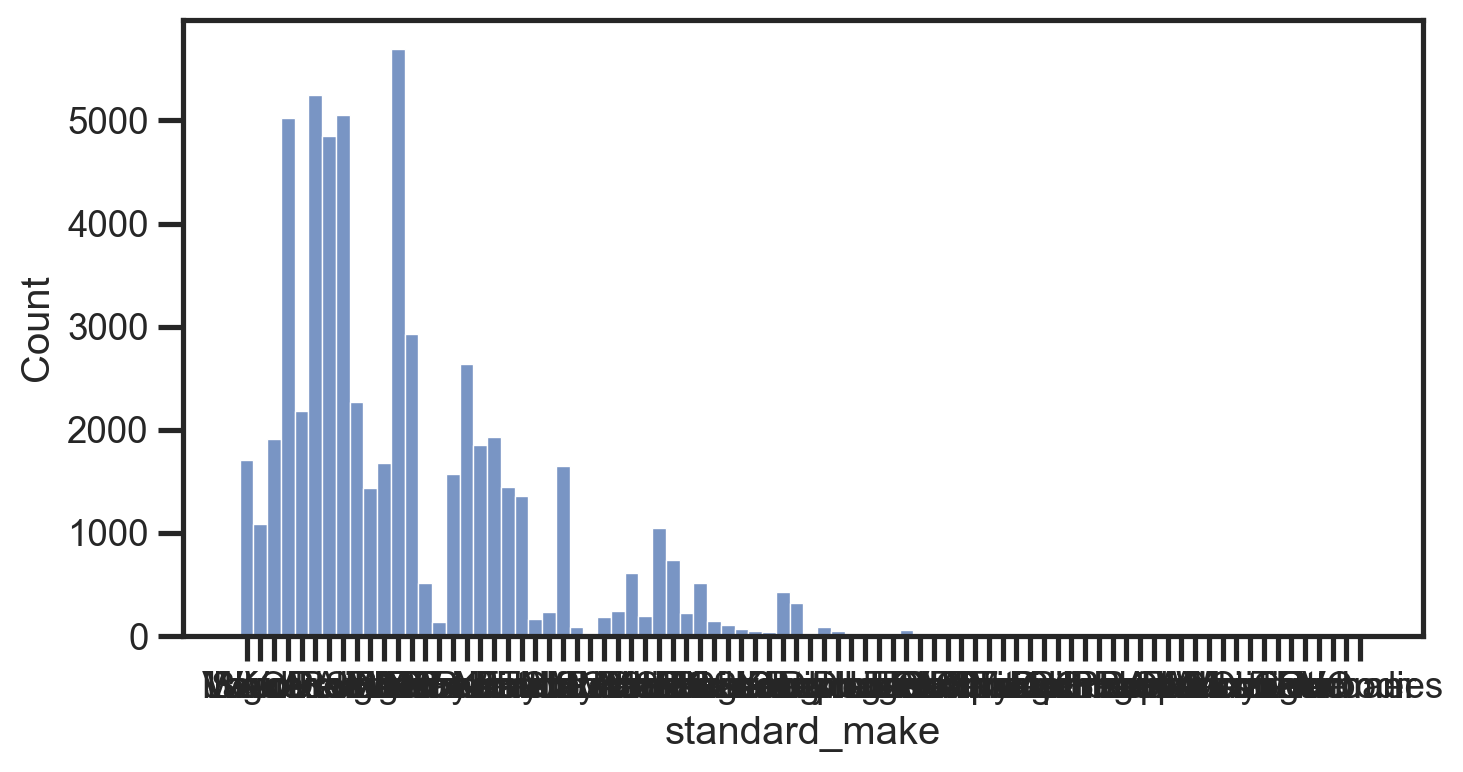

In [24]:
sns.histplot(data=adverts, x="standard_make",binwidth=3)

#sns.histplot(adverts['price'],bins=10000);

In [ ]:
price_used_car = np.array(adverts_1['Price_Of_Used_Car'])
print(price_used_car)

In [ ]:
price_new_car = price_new_car[np.logical_not(np.isnan(price_new_car))]
price_used_car = price_used_car[np.logical_not(np.isnan(price_used_car))]

* Grouping by the Body type and the condition of the vehicle (to aggregate the data based on the body type and the condition of vehicle.

In [ ]:
vehicle_catagories = adverts.groupby(['body_type','vehicle_condition'])
vehicle_catagories.first()

In [ ]:
#new_adverts.head()
suv = adverts.query("body_type=='SUV'")
suv.head()

### Mapping Vehicla condition
* 1- New 
* 2- USED

In [26]:
adverts['car_types'] = adverts['vehicle_condition'].map({'NEW': 1, 'USED': 2})
adverts.sample(10)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,car_types
2108-06-06,202010094816858,109.0,70,White,BMW,X4,USED,2020.0,51500,SUV,False,Petrol,2
2124-01-13,202010124904582,46000.0,15,Grey,Citroen,DS3,USED,2015.0,6250,Hatchback,False,Petrol,2
2047-09-19,202009103556012,12700.0,19,Black,BMW,X5,USED,2019.0,52991,SUV,False,Diesel,2
2071-05-05,202009143728687,28987.0,17,Grey,Mercedes-Benz,C Class,USED,2017.0,25500,Convertible,False,Petrol,2
2045-06-01,202010235351432,55750.0,66,Black,BMW,5 Series,USED,2016.0,14400,Saloon,False,Diesel,2
2078-12-30,202009304414930,77879.0,08,Grey,Peugeot,207,USED,2008.0,2995,Hatchback,False,Petrol,2
2053-05-13,202010205220948,100.0,70,NaN,Volvo,S60,USED,2020.0,26480,Saloon,False,Petrol,2
2015-07-13,202010195170343,15183.0,69,White,Nissan,X-Trail,USED,2019.0,18944,SUV,False,Diesel,2
1973-03-22,202010084750964,61500.0,63,Silver,Nissan,Qashqai,USED,2014.0,7650,SUV,False,Diesel,2
1979-02-18,202010215279294,140000.0,56,Silver,Volkswagen,Golf,USED,2006.0,1489,Hatchback,False,Petrol,2


In [59]:
dff=dff.transpose()
dff

year_of_registration,0,2011,2017,2016,2015,2017,2017,2013,2008,2019,...,2013,2015,2019,2009,2003,2019,2014,2018,2015,2020
body_type,SUV,Saloon,SUV,Hatchback,SUV,Convertible,Hatchback,SUV,Limousine,SUV,...,Saloon,SUV,Convertible,Hatchback,Hatchback,Hatchback,SUV,Hatchback,Hatchback,SUV
price,73970,7000,14000,7995,26995,29000,5861,24475,6995,79995,...,13500,15995,30699,1995,995,27016,29525,10340,5999,28990


In [28]:
adverts['year_of_registration'] = adverts['year_of_registration'].replace(np.nan,0)

In [29]:

adverts['year_of_registration']=adverts['year_of_registration'].astype(int)

In [30]:
adverts['year_of_registration']

1970-01-01       0
1970-01-02    2011
1970-01-03    2017
1970-01-04    2016
1970-01-05    2015
              ... 
2134-04-06    2019
2134-04-07    2014
2134-04-08    2018
2134-04-09    2015
2134-04-10    2020
Name: year_of_registration, Length: 60000, dtype: int64

In [31]:
dff = adverts.query("year_of_registration > 2000")

In [32]:
dff = adverts[['year_of_registration','body_type','price']]
#dff = adverts[['year_of_registration','body_type','price']]

In [33]:
dff=dff.set_index('year_of_registration')

In [34]:
dff.head(5)

,body_type,price
year_of_registration,,
0,SUV,73970
2011,Saloon,7000
2017,SUV,14000
2016,Hatchback,7995
2015,SUV,26995


* Below we are showing the pricing of the car types as per registraion year (Using Heatmap)

In [35]:
pricing_info=(
    dff.groupby(['body_type','year_of_registration'])
    ['price'].mean()
    .unstack('year_of_registration')).fillna(adverts['price'].mean())

<AxesSubplot: xlabel='year_of_registration', ylabel='body_type'>

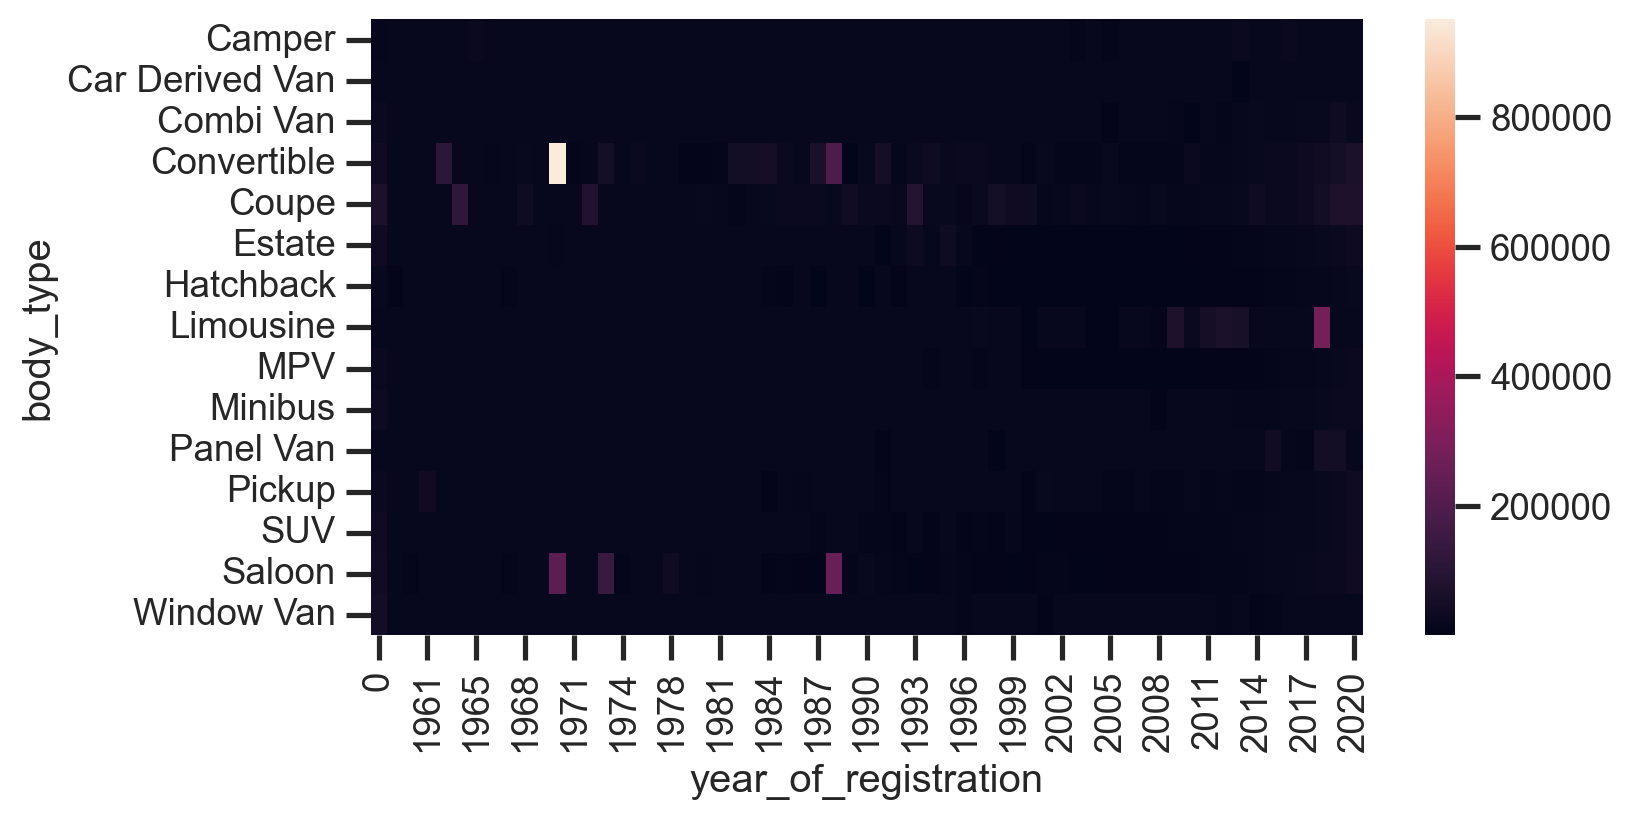

In [36]:
sns.heatmap(pricing_info)

In [37]:
adverts['year_of_registration'].astype(int)

1970-01-01       0
1970-01-02    2011
1970-01-03    2017
1970-01-04    2016
1970-01-05    2015
              ... 
2134-04-06    2019
2134-04-07    2014
2134-04-08    2018
2134-04-09    2015
2134-04-10    2020
Name: year_of_registration, Length: 60000, dtype: int64

In [38]:
adverts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60000 entries, 1970-01-01 to 2134-04-10
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   public_reference       60000 non-null  int64  
 1   mileage                59984 non-null  float64
 2   reg_code               60000 non-null  object 
 3   standard_colour        59229 non-null  object 
 4   standard_make          60000 non-null  object 
 5   standard_model         60000 non-null  object 
 6   vehicle_condition      60000 non-null  object 
 7   year_of_registration   60000 non-null  int64  
 8   price                  60000 non-null  int64  
 9   body_type              59880 non-null  object 
 10  crossover_car_and_van  60000 non-null  bool   
 11  fuel_type              59910 non-null  object 
 12  car_types              60000 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(7)
memory usage: 6.0+ MB


In [39]:
adverts.head(1)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,car_types
1970-01-01,202006039777689,0.0,NA,Grey,Volvo,XC90,NEW,0,73970,SUV,False,Petrol Plug-in Hybrid,1


In [40]:
lm_plot_1 = adverts[['body_type','price','year_of_registration','fuel_type']]

In [41]:
lm_plot_1 = lm_plot_1.query("year_of_registration > 2000")

In [42]:
lm_plot_1.head(2)

,body_type,price,year_of_registration,fuel_type
1970-01-02,Saloon,7000,2011,Diesel
1970-01-03,SUV,14000,2017,Petrol


### Below is the representation of price of the cars over the years categorised in the body types

* We are using lmplot to display the prices of all car types over the years

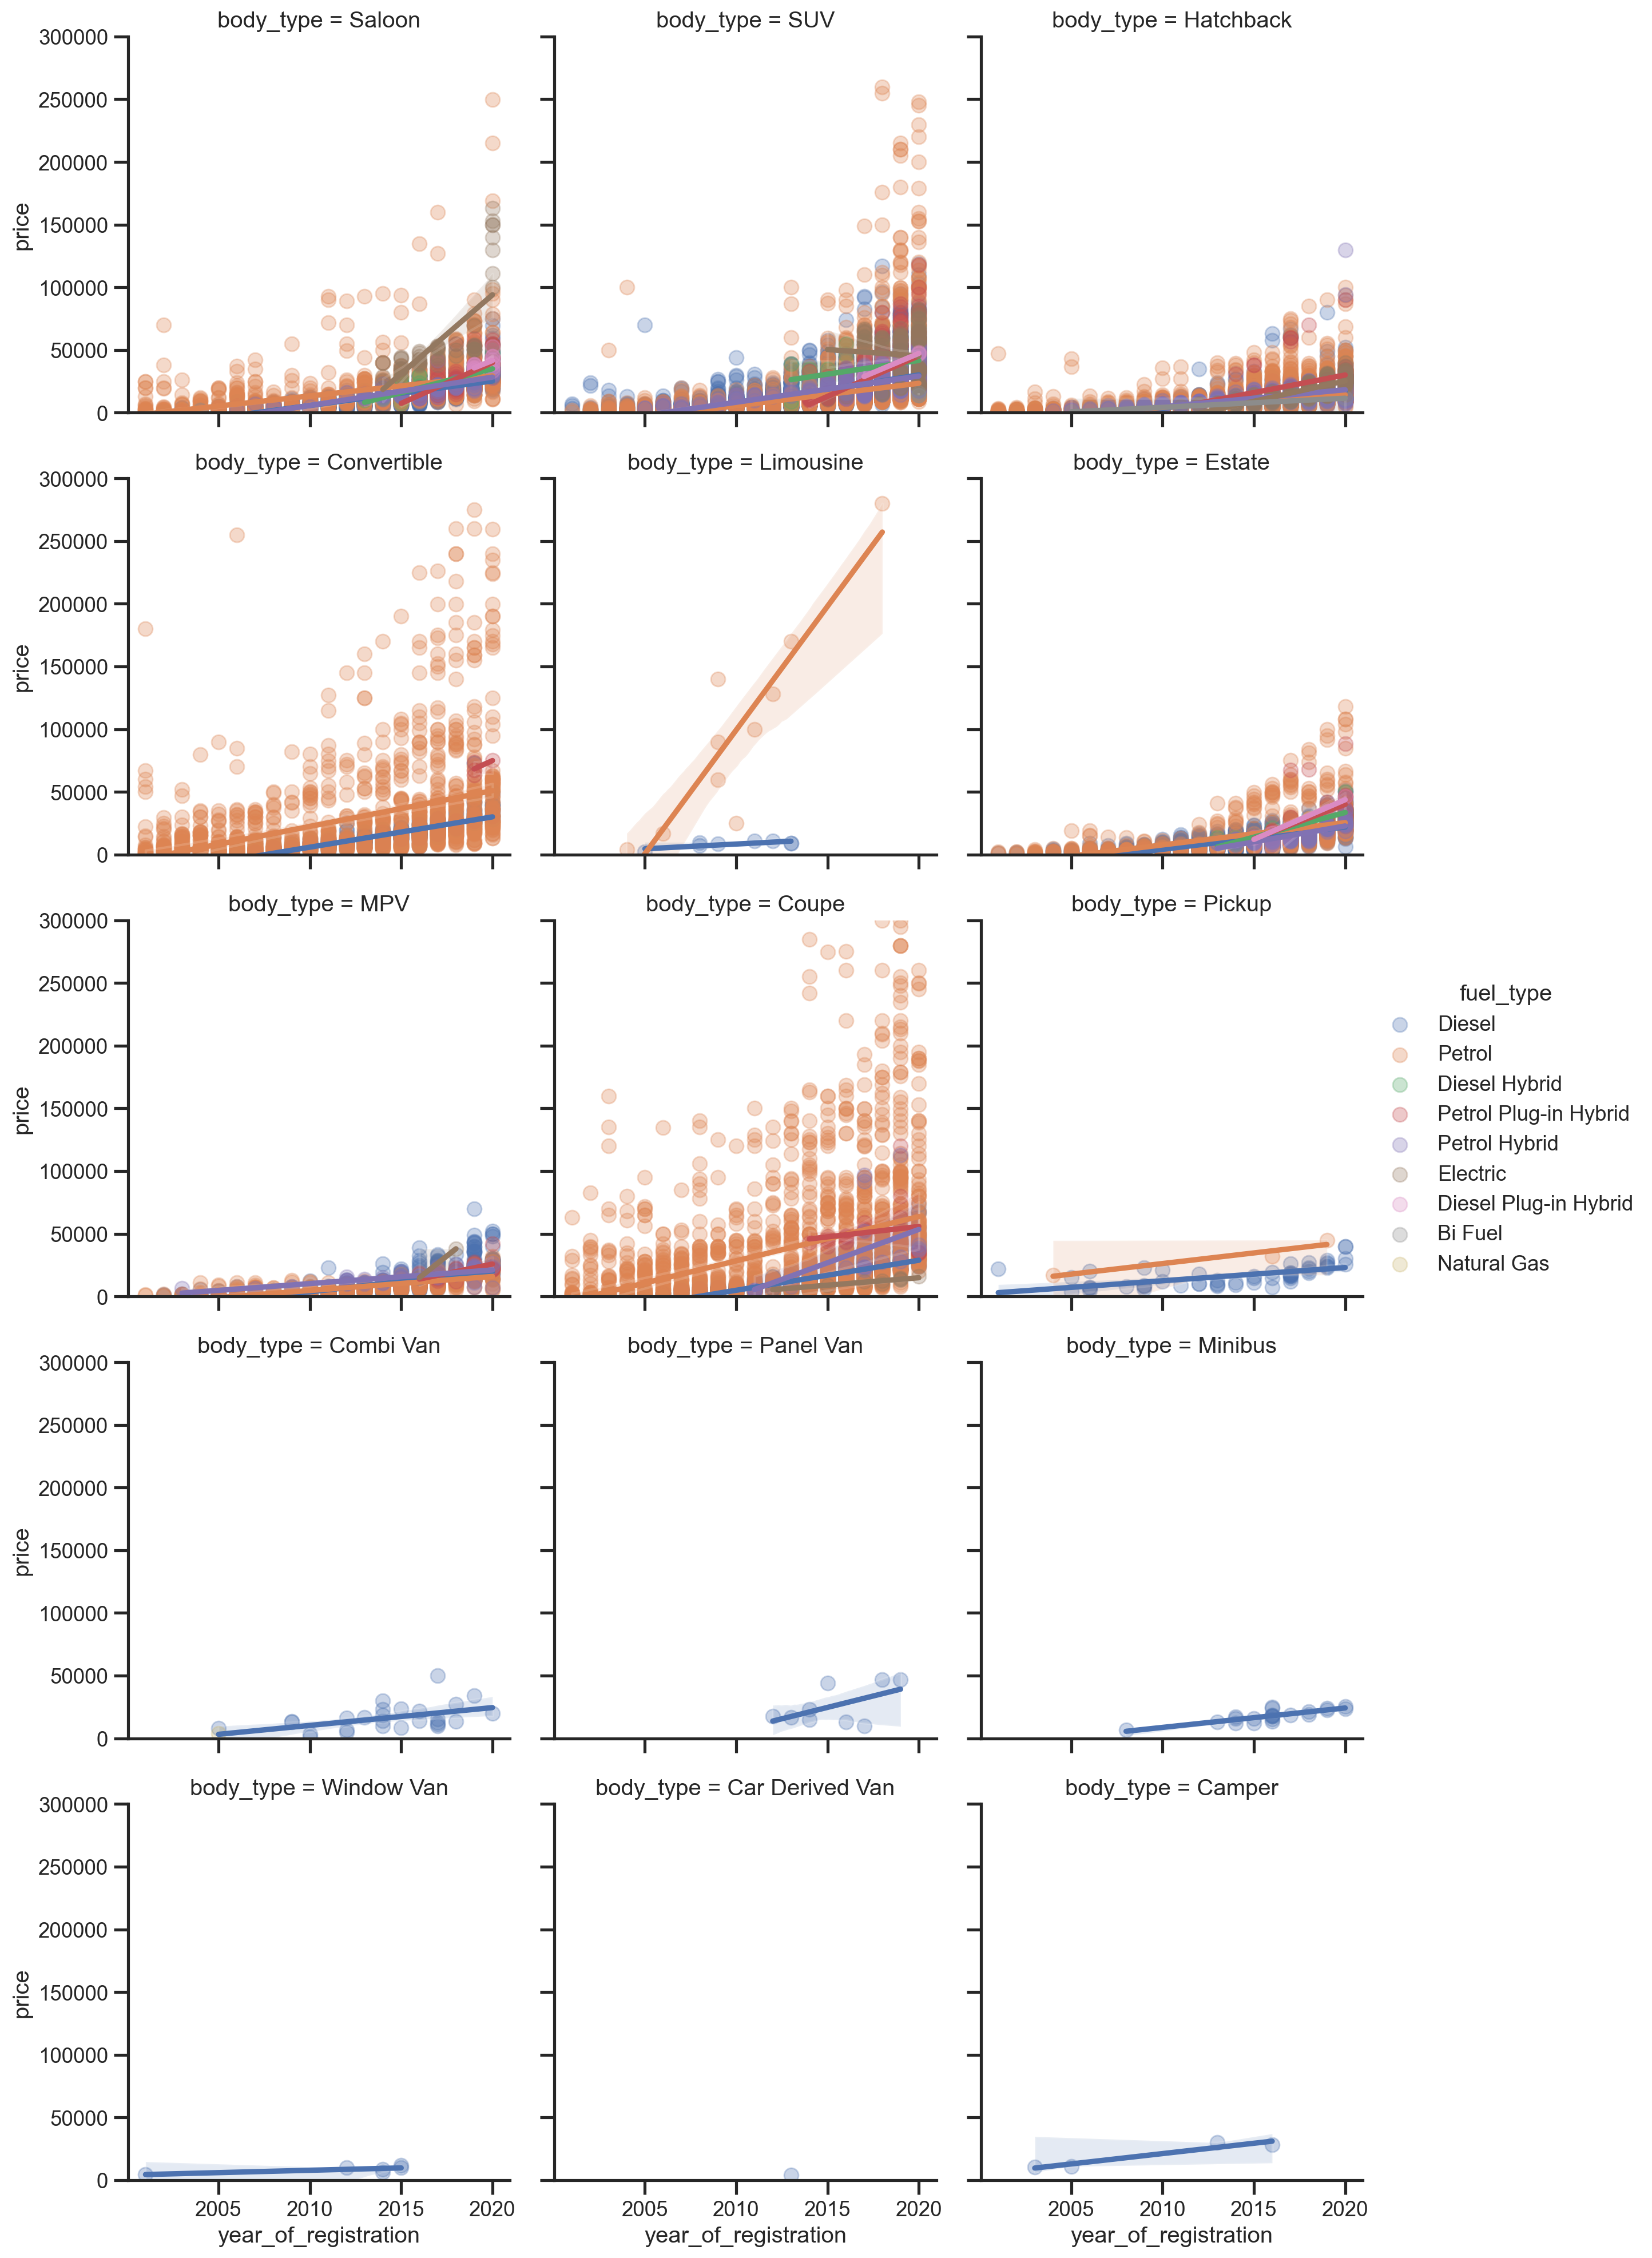

In [43]:
sns.lmplot(
    data=lm_plot_1, x='year_of_registration', hue='fuel_type', y='price', col='body_type', col_wrap=3,
    scatter_kws=dict(alpha=0.3), height=4
).set(ylim=(0, 300000))


In [51]:
adverts_new = adverts.query("body_type == 'Hatchback' or body_type == 'SUV' or body_type == 'Saloon' or body_type == 'Estate' or body_type == 'Coupe' or body_type == 'MPV' or body_type == 'Convertible'")

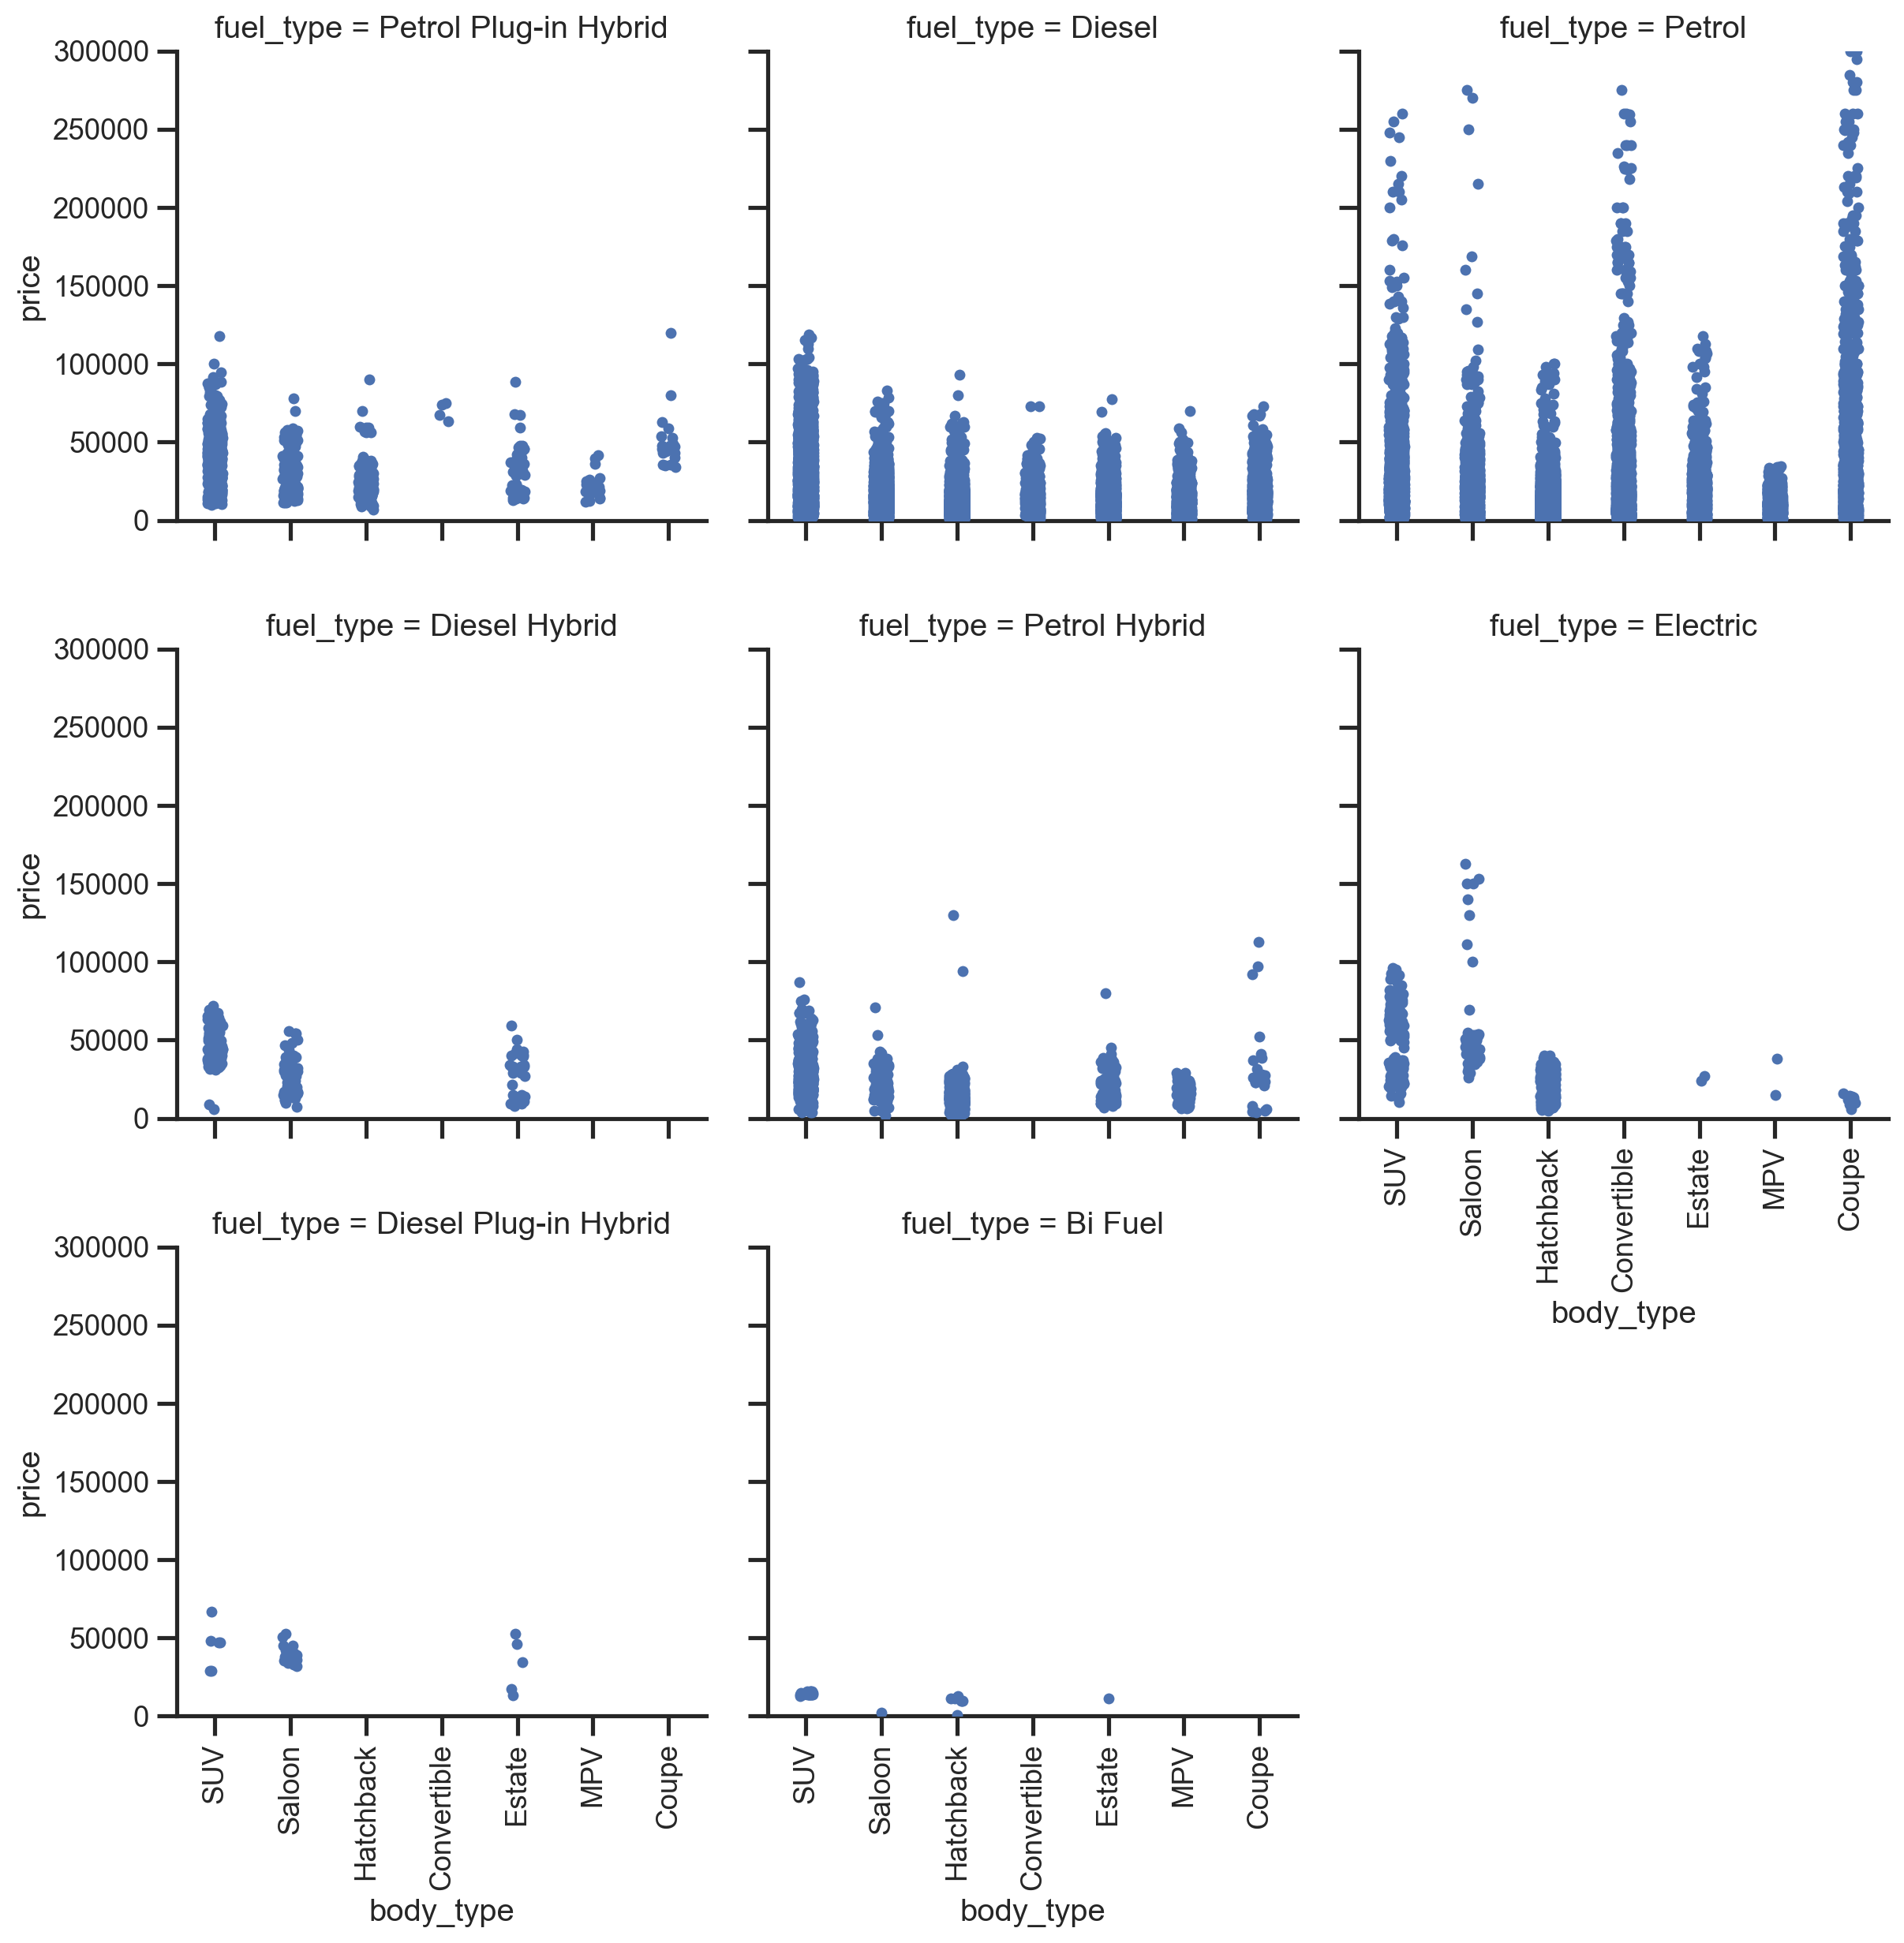

In [56]:
sns.catplot(
    data=adverts_new, col='fuel_type', x='body_type', y='price', height=4, col_wrap=3
).set(ylim=(0, 300000)).tick_params(axis='x', rotation=90);


In [63]:
adverts.head(5)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,car_types
1970-01-01,202006039777689,0.0,NA,Grey,Volvo,XC90,NEW,0,73970,SUV,False,Petrol Plug-in Hybrid,1
1970-01-02,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011,7000,Saloon,False,Diesel,2
1970-01-03,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017,14000,SUV,False,Petrol,2
1970-01-04,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016,7995,Hatchback,False,Diesel,2
1970-01-05,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015,26995,SUV,False,Diesel,2


In [ ]:
adverts = adverts.query('year_of_registration > 2010')
g = sns.FacetGrid(data=adverts, col='crossover_car_and_van', aspect=1.5)
g.map(sns.kdeplot, "year_of_registration","price");

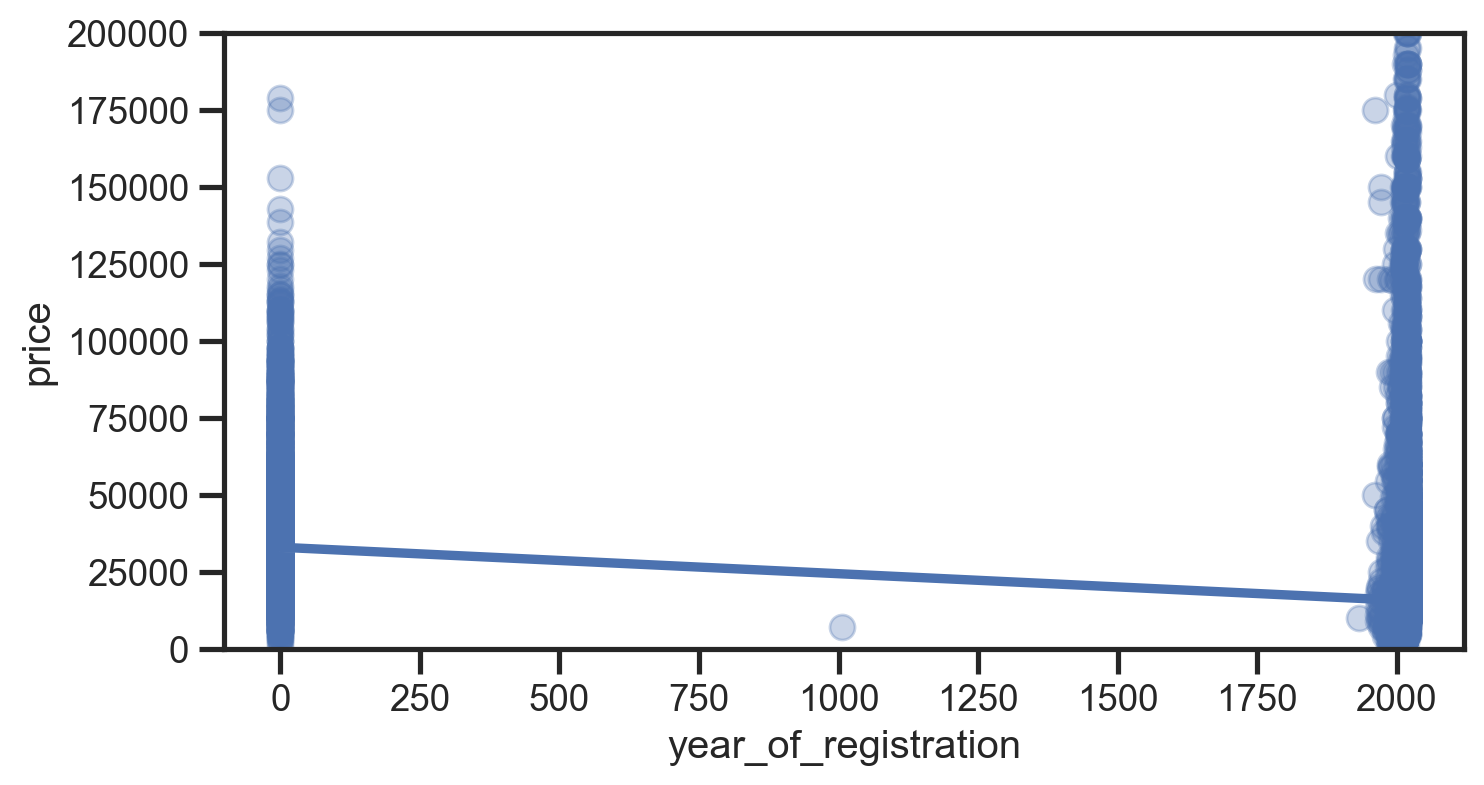

In [72]:
adverts = adverts.query('year_of_registration > 2010')
sns.regplot(data=adverts_new, x='year_of_registration', y='price', scatter_kws=dict(alpha=0.3)).set(ylim=(0,200000));

## Section 3: Analysis